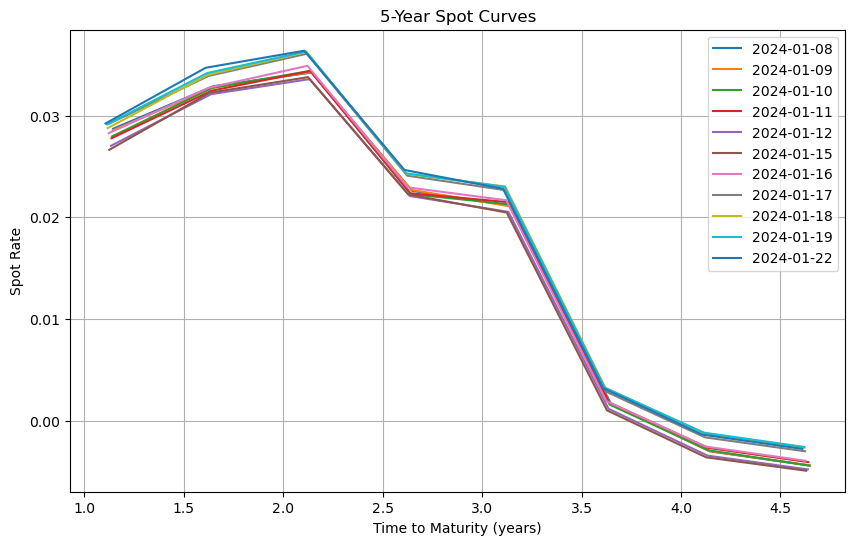

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
bond_data = pd.read_csv("bond_close_selected_dirty.csv")
# Convert dates to datetime objects for calculation
bond_data['Issue Date'] = pd.to_datetime(bond_data['Issue Date'])
bond_data['Maturity Date'] = pd.to_datetime(bond_data['Maturity Date'])
N = 100

# Corrected function to calculate the time to maturity in years
def calculate_time_to_maturity(maturity_date, valuation_date):
    days_in_year = 365.25 # considering leap years
    return (maturity_date - valuation_date).days / days_in_year

# Calculate spot rates for each bond and each day
spot_curve_data = {}

# Extract dates for plotting and calculation
dates = [col for col in bond_data.columns if '2024' in col]

def calculate_spot_rate(P, T):
    if T == 0:
        return 0
    return -(np.log(P/N) / T)


# Iterate over each date to calculate the spot rates
for date in dates:
    # Convert string to datetime for the 'date' column
    valuation_date = pd.to_datetime(date)
    spot_curve_data[date] = []

    # Calculate spot rates for bonds with maturities 1 to 5 years
    for i in range(len(bond_data)):
        # Calculate time to maturity
        T = calculate_time_to_maturity(bond_data.loc[i, 'Maturity Date'], valuation_date)
        # Skip if the time to maturity is not within the 1-5 year range
        if T < 1 or T > 5:
            continue
        # Calculate spot rate using the provided formula and append to the list
        P = bond_data.loc[i, date]  # Bond price
        r = calculate_spot_rate(P, T)
        spot_curve_data[date].append((T, r))

# Now let's plot the spot curves
plt.figure(figsize=(10, 6))

# Plot each day's spot curve
for date, rates in spot_curve_data.items():
    # Sort rates by maturity to ensure the curve is plotted correctly
    rates.sort(key=lambda x: x[0])
    terms, spot_rates = zip(*rates)  # Unzip the list of tuples
    plt.plot(terms, spot_rates, label=date)

# Configure plot
plt.title('5-Year Spot Curves')
plt.xlabel('Time to Maturity (years)')
plt.ylabel('Spot Rate')
plt.legend()
plt.grid(True)
plt.show()
